In [44]:
from nanodrivers.visa_drivers.anapico import ANAPICO
from nanodrivers.visa_drivers.SIM928_voltage_source import SIM # as DC
from nanodrivers.visa_drivers.vna import VNA

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat
from scipy.optimize import minimize
from scipy.fft import fft, ifft, fftshift, ifftshift


#file_store
import os

#time
import time
from datetime import datetime, timedelta


from ctypes import *
%matplotlib inline

Global_data_adress = r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA"
exp_name = 'TWPA_noise_9'
adress = Global_data_adress+'\\'+exp_name
if not os.path.exists(adress):
  os.mkdir(adress)
  print("Folder %s created!" % adress)
else:
  print("Folder %s already exists" % adress)


# Stable temperature since 02.06.2025

Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9 already exists


In [10]:
path = adress +'\\'+ 'fast_saturation'
if not os.path.exists(path):
  os.mkdir(path)
  print("Folder %s created!" % path)
else:
  print("Folder %s already exists" % path)

Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\fast_saturation already exists


In [11]:
dc = SIM(slot_num=7)
dc.idn()
dc.disconnect()
dc = SIM(slot_num=7)
dc.idn()

Unable to connect device.
 VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.
Check that device is connected, visible in NI MAX and is not used by another software.
Connection exist: Stanford_Research_Systems,SIM928,s/n035459,ver2.7

SIM928 is now disconnected from SIM900 mainframe
Connection exist: Stanford_Research_Systems,SIM928,s/n035459,ver2.7



In [12]:
vna = VNA()
vna.idn()

Connection exist: Rohde-Schwarz,ZNB20-2Port,1311601062102129,3.45



In [72]:
anapico = ANAPICO()
anapico.idn()

VisaIOError: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.

# Fast saturation measurements

In [15]:
np.linspace(-8,14,101)[71]

7.619999999999999

In [86]:
dc.set_volt(1.38)
dc.set_on()
anapico.set_power(1, 7.76)
anapico.set_freq(1, 10.77e9)
anapico.set_off(1)

vna.set_band(10000)
vna.set_nop(10001)
vna.set_cw_freq(5e9)

time.sleep(1)

mag_ref, pha_ref = vna.get_data()

avgs = 100
mag_tot = np.zeros((avgs, vna.get_nop()))
pha_tot = np.zeros((avgs, vna.get_nop()))

for i in range(avgs):
    anapico.set_off(1)
    time.sleep(1)
    anapico.set_on(1)
    mag_tot[i], pha_tot[i] = vna.get_data()

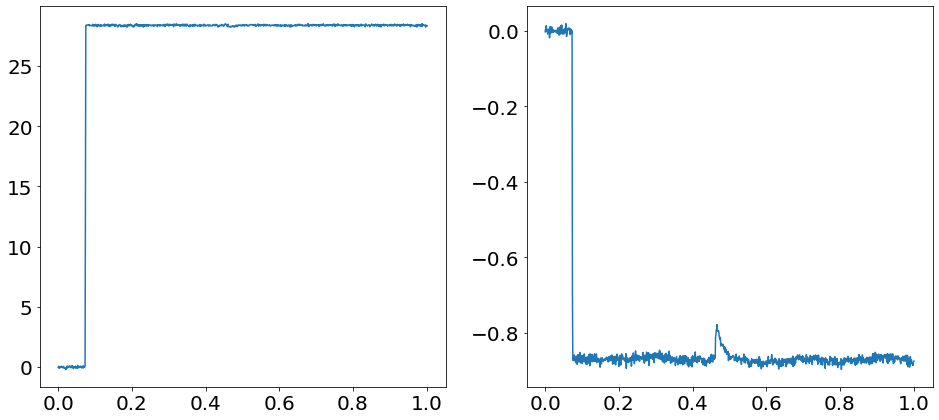

In [85]:
font = {'size'   : 20}
matplotlib.rc('font', **font)
fig2, ax = plt.subplots(1, 2, figsize=(16,7), sharex = True)

time_tot = 1/vna.get_band()*vna.get_nop()
ax[0].plot(np.linspace(0, time_tot, vna.get_nop()), np.mean(mag_tot, axis = 0) - mag_ref)
ax[1].plot(np.linspace(0, time_tot, vna.get_nop()), np.mean(pha_tot, axis = 0) - pha_ref)